## Import Dataset

In [1]:
import pandas as pd

# Load dataset from sample_data directory
file_path = "/content/sample_data/Hotel_dataset.csv"
df = pd.read_csv(file_path)

# Display first few rows
df.head()


,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status
0,INN00001,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.00,0,10/2/2015,Not_Canceled
1,INN00002,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,11/6/2018,Not_Canceled
2,INN00003,2,1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,50.00,0,2/28/2018,Canceled
3,INN00004,1,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,1,5/20/2017,Canceled
4,INN00005,1,0,1,2,Not Selected,0,Room_Type 1,48,Online,0,0,0,77.00,0,4/11/2018,Canceled


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36285 entries, 0 to 36284
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Booking_ID                36285 non-null  object 
 1   number of adults          36285 non-null  int64  
 2   number of children        36285 non-null  int64  
 3   number of weekend nights  36285 non-null  int64  
 4   number of week nights     36285 non-null  int64  
 5   type of meal              36285 non-null  object 
 6   car parking space         36285 non-null  int64  
 7   room type                 36285 non-null  object 
 8   lead time                 36285 non-null  int64  
 9   market segment type       36285 non-null  object 
 10  repeated                  36285 non-null  int64  
 11  P-C                       36285 non-null  int64  
 12  P-not-C                   36285 non-null  int64  
 13  average price             36285 non-null  float64
 14  specia

In [ ]:

# Display dataset shape
print(f"\nDataset contains {df.shape[0]} rows and {df.shape[1]} columns.")





Dataset contains 36285 rows and 17 columns.


In [ ]:


# Checking for missing values
print("\nMissing Values:")
print(df.isnull().sum())





Missing Values:
Booking_ID                  0
number of adults            0
number of children          0
number of weekend nights    0
number of week nights       0
type of meal                0
car parking space           0
room type                   0
lead time                   0
market segment type         0
repeated                    0
P-C                         0
P-not-C                     0
average price               0
special requests            0
date of reservation         0
booking status              0
dtype: int64


In [ ]:
# Statistical summary
print("\nStatistical Summary:")
display(df.describe())



Statistical Summary:


,number of adults,number of children,number of weekend nights,number of week nights,car parking space,lead time,repeated,P-C,P-not-C,average price,special requests
count,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000
mean,1.844839,0.105360,0.810693,2.204602,0.030977,85.239851,0.025630,0.023343,0.153369,103.421636,0.619733
std,0.518813,0.402704,0.870590,1.410946,0.173258,85.938796,0.158032,0.368281,1.753931,35.086469,0.786262
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,1.000000,13.000000,58.000000,540.000000,5.000000


In [ ]:
# Checking for duplicates
duplicate_rows = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicate_rows}")



Number of duplicate rows: 0


In [6]:
print("Column names before stripping:", df.columns.tolist())
df.columns = df.columns.str.strip()  # Remove leading/trailing spaces in column names
print("Column names after stripping:", df.columns.tolist())


Column names before stripping: ['Booking_ID', 'number of adults', 'number of children', 'number of weekend nights', 'number of week nights', 'type of meal', 'car parking space', 'room type', 'lead time', 'market segment type', 'repeated', 'P-C', 'P-not-C', 'average price ', 'special requests', 'date of reservation', 'booking status']
Column names after stripping: ['Booking_ID', 'number of adults', 'number of children', 'number of weekend nights', 'number of week nights', 'type of meal', 'car parking space', 'room type', 'lead time', 'market segment type', 'repeated', 'P-C', 'P-not-C', 'average price', 'special requests', 'date of reservation', 'booking status']


In [11]:
# Detect columns with string values
string_columns = df.select_dtypes(include=['object']).columns

# Check for leading/trailing whitespace in string columns
for col in string_columns:
    has_whitespace = df[col].astype(str).str.contains(r'^\s+|\s+$').any()
    if has_whitespace:
        print(f"Column '{col}' has leading/trailing whitespace.")
    else :
        print(f"Column '{col}' does not have leading/trailing whitespace.")


Column 'Booking_ID' does not have leading/trailing whitespace.
Column 'type of meal' does not have leading/trailing whitespace.
Column 'room type' does not have leading/trailing whitespace.
Column 'market segment type' does not have leading/trailing whitespace.
Column 'date of reservation' does not have leading/trailing whitespace.
Column 'booking status' does not have leading/trailing whitespace.


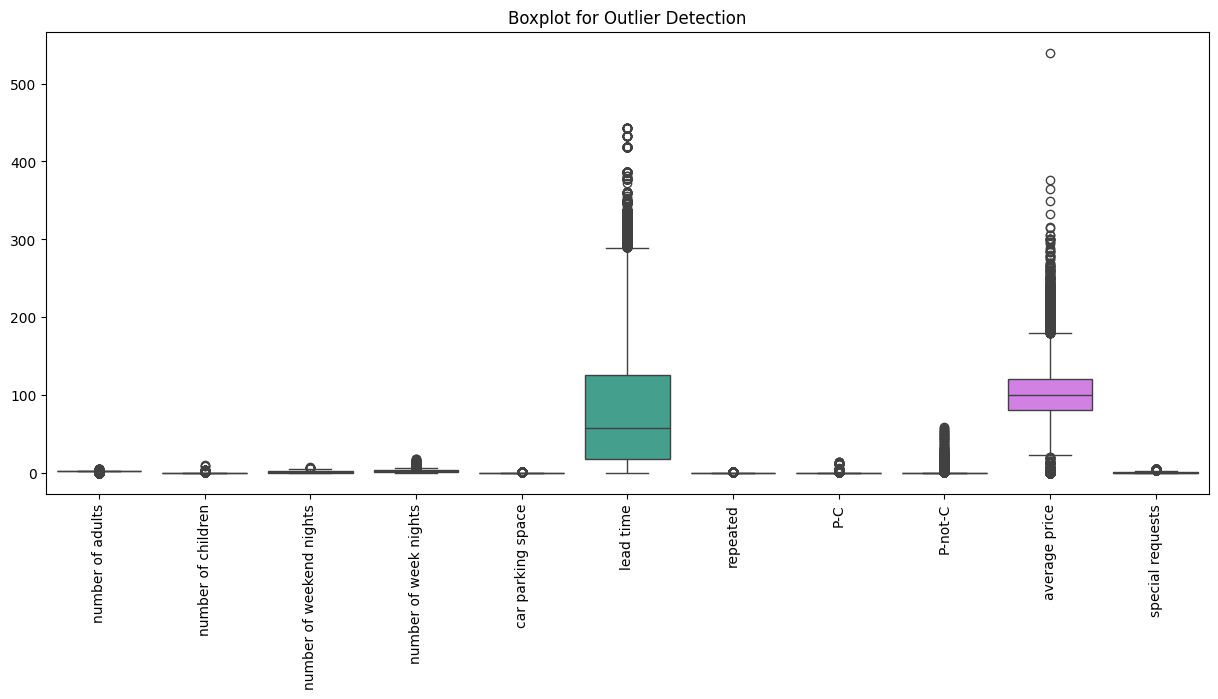

In [13]:
# Boxplots for outlier detection
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 6))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.title("Boxplot for Outlier Detection")
plt.show()

In [14]:
print(df)

      Booking_ID  number of adults  number of children  \
0       INN00001                 1                   1   
1       INN00002                 1                   0   
2       INN00003                 2                   1   
3       INN00004                 1                   0   
4       INN00005                 1                   0   
...          ...               ...                 ...   
36280   INN36282                 2                   0   
36281   INN36283                 2                   0   
36282   INN36284                 2                   0   
36283   INN36285                 3                   0   
36284   INN36286                 2                   0   

       number of weekend nights  number of week nights  type of meal  \
0                             2                      5   Meal Plan 1   
1                             1                      3  Not Selected   
2                             1                      3   Meal Plan 1   
3              

In [19]:
df.head()

,number of adults,number of children,number of weekend nights,number of week nights,car parking space,lead time,repeated,P-C,P-not-C,average price,...,room type_Room_Type 2,room type_Room_Type 3,room type_Room_Type 4,room type_Room_Type 5,room type_Room_Type 6,room type_Room_Type 7,market segment type_Complementary,market segment type_Corporate,market segment type_Offline,market segment type_Online
0,1,1,2,5,0,224,0,0,0,88.00,...,False,False,False,False,False,False,False,False,True,False
1,1,0,1,3,0,5,0,0,0,106.68,...,False,False,False,False,False,False,False,False,False,True
2,2,1,1,3,0,1,0,0,0,50.00,...,False,False,False,False,False,False,False,False,False,True
3,1,0,0,2,0,211,0,0,0,100.00,...,False,False,False,False,False,False,False,False,False,True
4,1,0,1,2,0,48,0,0,0,77.00,...,False,False,False,False,False,False,False,False,False,True


In [18]:
df.head()

,number of adults,number of children,number of weekend nights,number of week nights,car parking space,lead time,repeated,P-C,P-not-C,average price,...,room type_Room_Type 2,room type_Room_Type 3,room type_Room_Type 4,room type_Room_Type 5,room type_Room_Type 6,room type_Room_Type 7,market segment type_Complementary,market segment type_Corporate,market segment type_Offline,market segment type_Online
0,1,1,2,5,0,224,0,0,0,88.00,...,False,False,False,False,False,False,False,False,True,False
1,1,0,1,3,0,5,0,0,0,106.68,...,False,False,False,False,False,False,False,False,False,True
2,2,1,1,3,0,1,0,0,0,50.00,...,False,False,False,False,False,False,False,False,False,True
3,1,0,0,2,0,211,0,0,0,100.00,...,False,False,False,False,False,False,False,False,False,True
4,1,0,1,2,0,48,0,0,0,77.00,...,False,False,False,False,False,False,False,False,False,True


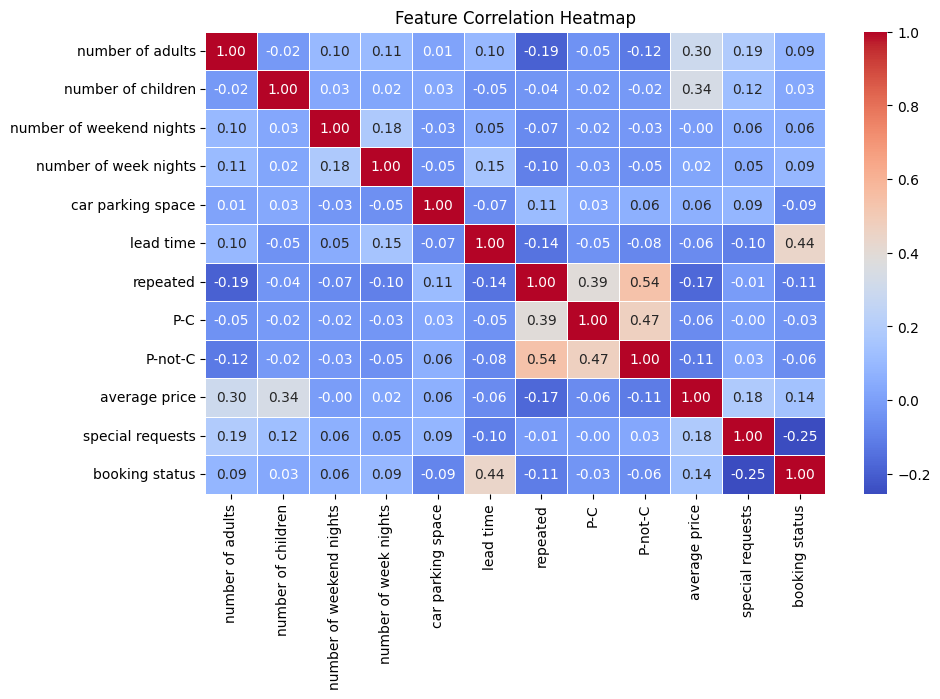

In [20]:
# Selecting only numeric columns for correlation
numeric_df = df.select_dtypes(include=['number'])

# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


# 📌 Step 1: Data Preprocessing

In [ ]:
# Remove leading/trailing spaces from column names
df.columns = df.columns.str.strip()

# Convert date column to datetime format
df['date of reservation'] = pd.to_datetime(df['date of reservation'], errors='coerce')

# Check for whitespace in categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col] = df[col].str.strip()

# Verify changes
print("\nUpdated Column Data Types:")
print(df.dtypes)

# Check for missing values again
print("\nMissing Values After Cleaning:")
print(df.isnull().sum())



Updated Column Data Types:
Booking_ID                          object
number of adults                     int64
number of children                   int64
number of weekend nights             int64
number of week nights                int64
type of meal                        object
car parking space                    int64
room type                           object
lead time                            int64
market segment type                 object
repeated                             int64
P-C                                  int64
P-not-C                              int64
average price                      float64
special requests                     int64
date of reservation         datetime64[ns]
booking status                      object
dtype: object

Missing Values After Cleaning:
Booking_ID                   0
number of adults             0
number of children           0
number of weekend nights     0
number of week nights        0
type of meal                 0
car parki

#📌 Step 2: Outlier Detection & Handling (IQR & Z-Score)


In [27]:
from scipy import stats

# Use IQR to detect outliers in numerical columns
num_cols = df.select_dtypes(include=['number']).columns

Q1 = df[num_cols].quantile(0.25)
Q3 = df[num_cols].quantile(0.75)
IQR = Q3 - Q1

# Filtering out outliers using IQR method
df_no_outliers = df[~((df[num_cols] < (Q1 - 1.5 * IQR)) | (df[num_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

# Check how many rows were removed
print(f"\nRows before outlier removal: {df.shape[0]}")
print(f"Rows after outlier removal: {df_no_outliers.shape[0]}")



Rows before outlier removal: 36285
Rows after outlier removal: 20818


# 📌 Step 3: Feature Engineering


In [28]:
# Drop unnecessary columns (e.g., Booking_ID)
df_no_outliers.drop(columns=['Booking_ID', 'date of reservation'], inplace=True)

# Encode binary categorical variables
df_no_outliers['booking status'] = df_no_outliers['booking status'].map({'Not_Canceled': 0, 'Canceled': 1})


<ipython-input-28-c5d3df4cb05d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers.drop(columns=['Booking_ID', 'date of reservation'], inplace=True)
<ipython-input-28-c5d3df4cb05d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers['booking status'] = df_no_outliers['booking status'].map({'Not_Canceled': 0, 'Canceled': 1})


In [29]:
df_no_outliers.head()

,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,booking status
12,2,0,2,1,Not Selected,0,Room_Type 1,30,Online,0,0,0,88.0,0,1
14,2,0,0,2,Meal Plan 1,0,Room_Type 1,47,Online,0,0,0,94.5,2,0
15,2,0,0,2,Meal Plan 2,0,Room_Type 1,256,Online,0,0,0,115.0,1,1
17,2,0,1,3,Not Selected,0,Room_Type 1,1,Online,0,0,0,96.0,1,0
18,2,0,2,2,Meal Plan 1,0,Room_Type 1,99,Online,0,0,0,65.0,0,1



# 📌 Step 4: Categorical Data Transformation



In [30]:
from sklearn.preprocessing import OneHotEncoder

# Encode categorical features
cat_features = ['type of meal', 'room type', 'market segment type']
df_encoded = pd.get_dummies(df_no_outliers, columns=cat_features, drop_first=True)

print("\nTransformed Dataset Shape:", df_encoded.shape)



Transformed Dataset Shape: (20818, 24)


#📌 Step 5: Train-Test Split


In [31]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df_encoded.drop(columns=['booking status'])
y = df_encoded['booking status']

# Split into train & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("\nTrain-Test Split Done!")
print(f"Train set: {X_train.shape}, Test set: {X_test.shape}")



Train-Test Split Done!
Train set: (16654, 23), Test set: (4164, 23)


#📌 Step 6: Modeling & Accuracy Calculation



In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Train model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy: {accuracy:.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))



Model Accuracy: 0.8602

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.91      0.90      2771
           1       0.82      0.75      0.78      1393

    accuracy                           0.86      4164
   macro avg       0.85      0.83      0.84      4164
weighted avg       0.86      0.86      0.86      4164



# 🔹 Step 7: Check for Multicollinearity (VIF)


In [35]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Compute VIF for numeric features
X_numeric = X.select_dtypes(include=['number'])
vif_data = pd.DataFrame()
vif_data["Feature"] = X_numeric.columns
vif_data["VIF"] = [variance_inflation_factor(X_numeric.values, i) for i in range(len(X_numeric.columns))]

print("\nVariance Inflation Factor (VIF) for Each Feature:")
print(vif_data)



Variance Inflation Factor (VIF) for Each Feature:
                     Feature        VIF
0           number of adults  25.286216
1         number of children        NaN
2   number of weekend nights   1.018997
3      number of week nights   1.028928
4          car parking space        NaN
5                  lead time   1.049614
6                   repeated        NaN
7                        P-C        NaN
8                    P-not-C        NaN
9             average price    1.052369
10          special requests   1.041787


/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


# 🔹 Step 8: Apply Linear Regression


In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Train Linear Regression Model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Predict
y_train_pred = linear_model.predict(X_train)
y_test_pred = linear_model.predict(X_test)

# Evaluate Performance
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

print(f"\nLinear Regression MSE - Train: {train_mse:.4f}, Test: {test_mse:.4f}")


# If test MSE >> train MSE, the model may be overfitting.
# If test MSE ≈ train MSE, the model generalizes well.



Linear Regression MSE - Train: 0.1470, Test: 0.1491


# 🔹 Step 9: Apply Polynomial Regression

In [38]:
from sklearn.preprocessing import PolynomialFeatures

# Transform features to polynomial
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Train Polynomial Regression
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

# Predictions
y_train_poly_pred = poly_model.predict(X_train_poly)
y_test_poly_pred = poly_model.predict(X_test_poly)

# Evaluate
train_poly_mse = mean_squared_error(y_train, y_train_poly_pred)
test_poly_mse = mean_squared_error(y_test, y_test_poly_pred)

print(f"\nPolynomial Regression MSE - Train: {train_poly_mse:.4f}, Test: {test_poly_mse:.4f}")

# Low Train & Test MSE → Model fits well.
# Train MSE << Test MSE → Model is overfitting (too complex).
# Both Train & Test MSE are high → Model is underfitting (too simple)



Polynomial Regression MSE - Train: 0.1363, Test: 0.1404


# 🔹 Step 10: Apply Logistic Regression (Binary Classification)

In [39]:
from sklearn.linear_model import LogisticRegression

# Train Logistic Regression Model
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train, y_train)

# Predict
y_logistic_pred = logistic_model.predict(X_test)

# Evaluate Accuracy
accuracy = accuracy_score(y_test, y_logistic_pred)
print(f"\nLogistic Regression Accuracy: {accuracy:.4f}")

# Accuracy close to 1 (e.g., 0.95 or 95%) → Model is performing well.
# Accuracy around 0.5 (50%) → Model is no better than random guessing.
# Very high accuracy (99%+) → May indicate overfitting


Logistic Regression Accuracy: 0.7901


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [40]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_logistic_pred))


[[2433  338]
 [ 536  857]]


In [41]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_logistic_pred))


              precision    recall  f1-score   support

           0       0.82      0.88      0.85      2771
           1       0.72      0.62      0.66      1393

    accuracy                           0.79      4164
   macro avg       0.77      0.75      0.76      4164
weighted avg       0.79      0.79      0.79      4164



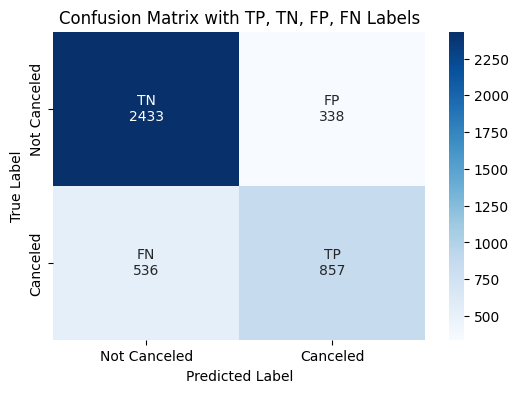

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_test, y_logistic_pred)

# Define TP, TN, FP, FN
TN, FP, FN, TP = cm.ravel()

# Create labeled matrix
labels = [[f"TN\n{TN}", f"FP\n{FP}"], [f"FN\n{FN}", f"TP\n{TP}"]]

# Plot confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=labels, fmt="", cmap="Blues", xticklabels=["Not Canceled", "Canceled"], yticklabels=["Not Canceled", "Canceled"])

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix with TP, TN, FP, FN Labels")
plt.show()


In [ ]:
# True Positives (TP) = 857
# → Correctly predicted Canceled bookings.

# True Negatives (TN) = 2433
# → Correctly predicted Not Canceled bookings.

# False Positives (FP) = 338
# → Incorrectly predicted Canceled when it was actually Not Canceled.

# False Negatives (FN) = 536
# → Incorrectly predicted Not Canceled when it was actually Canceled.